In [1]:
import pandas as pd
diabetes=pd.read_csv('D:/Vit/Semester_5/MachineLearning/Lab/pokemon/poke.csv')
diabetes=diabetes.loc[(diabetes['Legendary'].isin([0,1]))]
diabetes.head()

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,0
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,0
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,0
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,0
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,0


In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sb

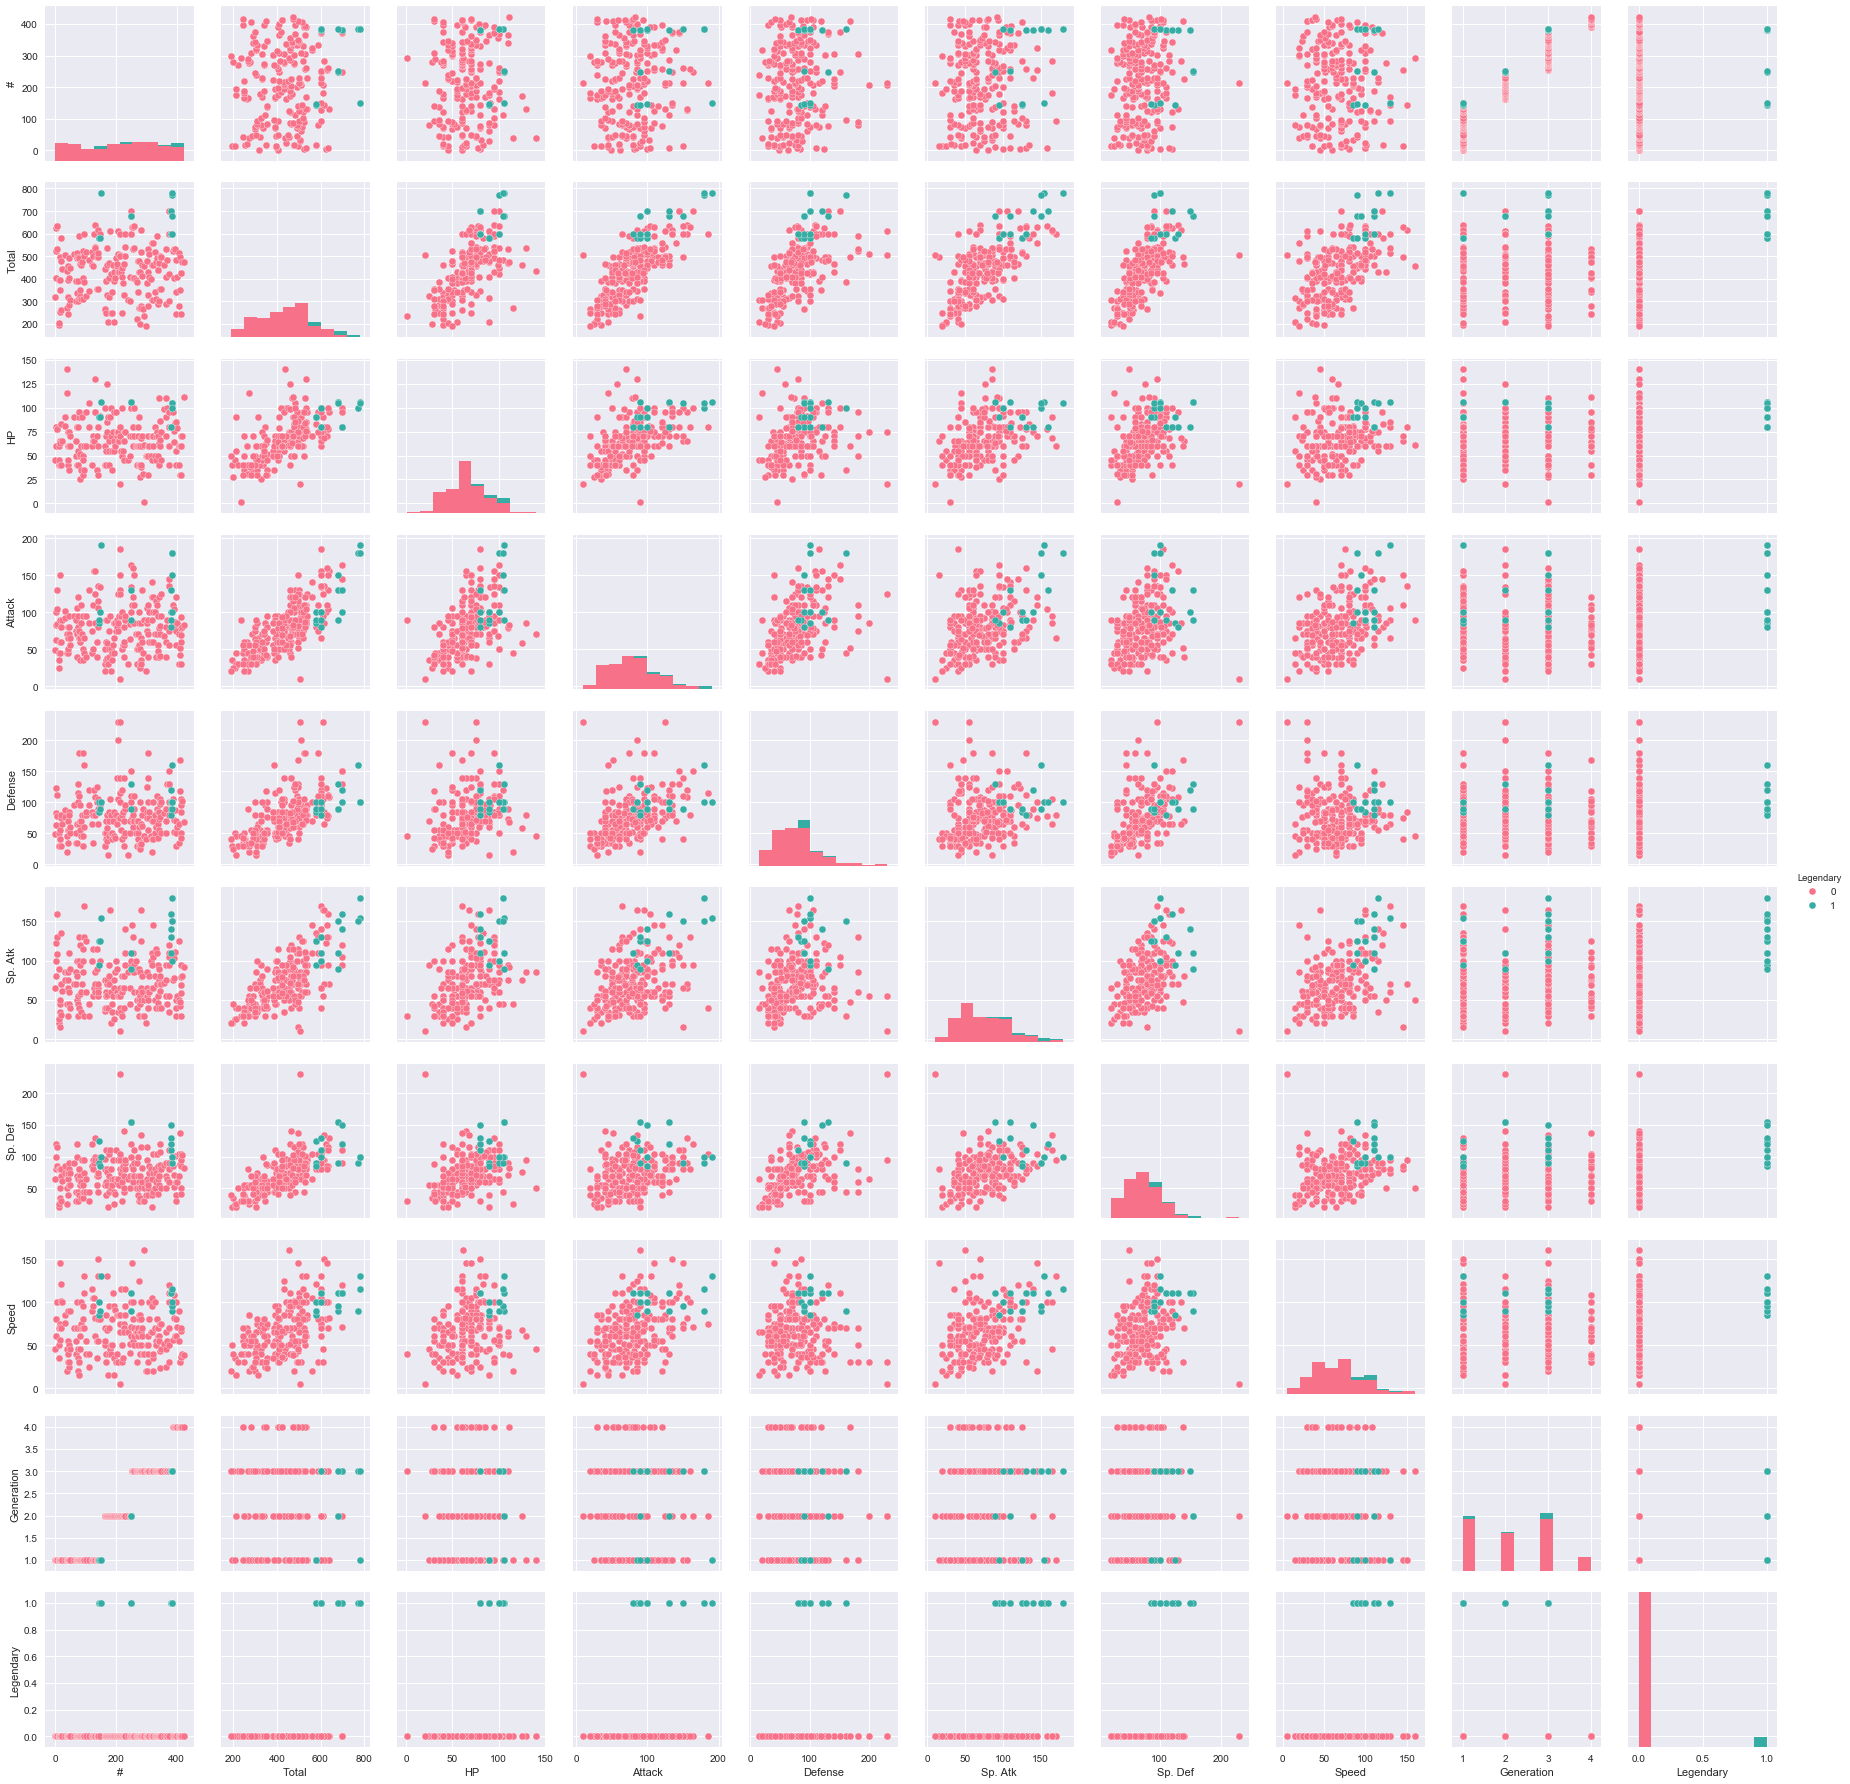

In [3]:
sb.pairplot(diabetes.dropna(), hue='Legendary',palette="husl")

In [20]:
X = diabetes[['Speed','Total']]
y = diabetes['Legendary']
X=X.values
y=y.values

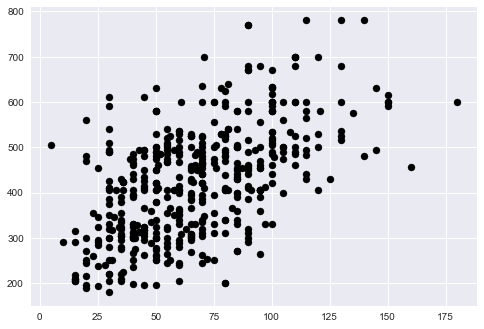

In [7]:
plt.scatter(X[:,0],  X[:,1],  c='black',   marker='o',  s=50)  

In [8]:
from sklearn.cluster import KMeans
km = KMeans(n_clusters=3,init='random', n_init=10, max_iter=300,tol=1e-04, random_state=0)
y_km = km.fit_predict(X) 

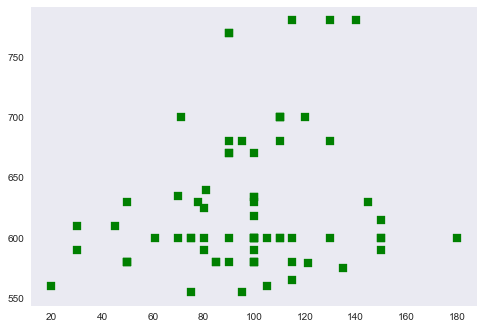

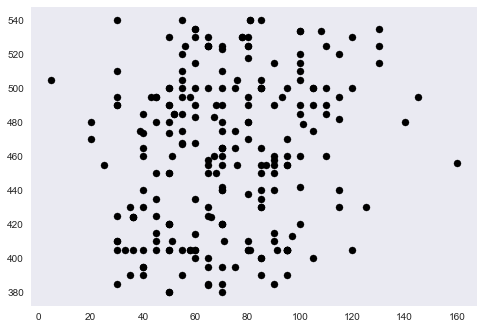

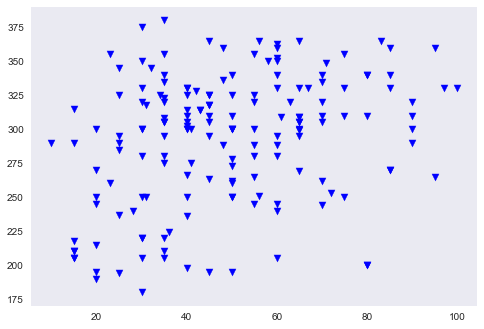

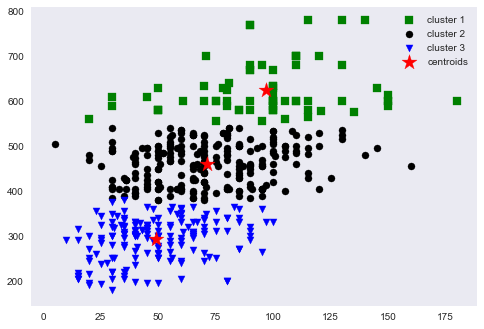

In [9]:
plt.scatter(X[y_km==0,0],X[y_km ==0,1],s=50,c='green', marker='s', label='cluster 1')
plt.grid()
plt.show()
plt.scatter(X[y_km ==1,0], X[y_km ==1,1], s=50, c='black', marker='o', label='cluster 2')
plt.grid()
plt.show()
plt.scatter(X[y_km ==2,0], X[y_km ==2,1], s=50, c='blue', marker='v', label='cluster 3')
plt.grid()
plt.show()
plt.scatter(X[y_km==0,0],X[y_km ==0,1],s=50,c='green', marker='s', label='cluster 1')
plt.scatter(X[y_km ==1,0], X[y_km ==1,1], s=50, c='black', marker='o', label='cluster 2')
plt.scatter(X[y_km ==2,0], X[y_km ==2,1], s=50, c='blue', marker='v', label='cluster 3')
plt.scatter(km.cluster_centers_[:,0], km.cluster_centers_[:,1], s=250, marker='*', c='red', label='centroids')
plt.legend()
plt.grid()
plt.show()

7544330.67373
2667847.21909
1381717.93167
956825.870745
730927.312219
565523.974205
484622.322379
432791.247154
384443.290374
351216.488359


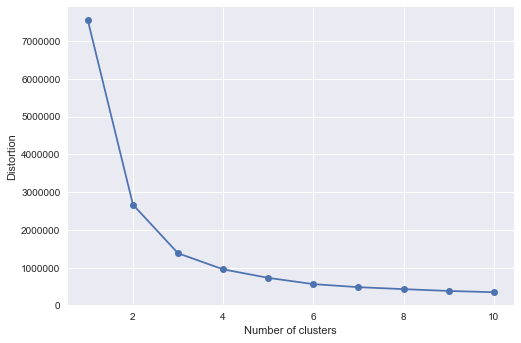

In [10]:
distortions = []
for i in range(1, 11):
    km = KMeans(n_clusters=i,init='k-means++',n_init=10,max_iter=300,random_state=0)
    km.fit(X)
    distortions.append(km.inertia_)
    print(km.inertia_)
plt.plot(range(1,11), distortions, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Distortion')
plt.show()

In [11]:
km = KMeans(n_clusters=3,init='k-means++',n_init=10,max_iter=300,tol=1e-04,random_state=0)
y_km = km.fit_predict(X)

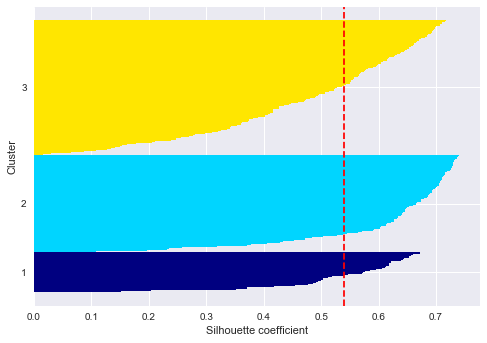

In [14]:
import numpy as np
from matplotlib import cm
from sklearn.metrics import silhouette_samples
cluster_labels = np.unique(y_km)
n_clusters = cluster_labels.shape[0]
silhouette_vals = silhouette_samples(X,y_km,metric='euclidean')
y_ax_lower, y_ax_upper = 0, 0
yticks = []
for i, c in enumerate(cluster_labels):
    c_silhouette_vals = silhouette_vals[y_km == c]
    c_silhouette_vals.sort()
    y_ax_upper += len(c_silhouette_vals)
    color = cm.jet(i / n_clusters)
    plt.barh(range(y_ax_lower, y_ax_upper),c_silhouette_vals,height=1.0,edgecolor='none',color=color)
    yticks.append((y_ax_lower + y_ax_upper) / 2)
    y_ax_lower += len(c_silhouette_vals)
silhouette_avg = np.mean(silhouette_vals)
plt.axvline(silhouette_avg,color="red",linestyle="--")
plt.yticks(yticks, cluster_labels + 1)
plt.ylabel('Cluster')
plt.xlabel('Silhouette coefficient')
plt.show()

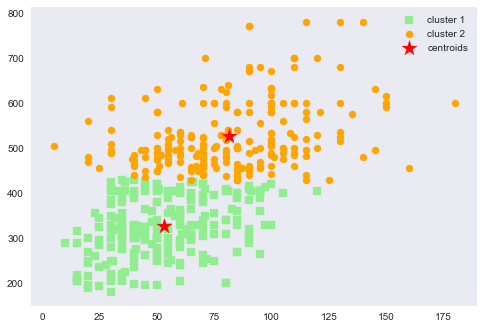

In [21]:
km = KMeans(n_clusters=2,init='k-means++',n_init=10,max_iter=300, tol=1e-04, random_state=0)
y_km = km.fit_predict(X)
plt.scatter(X[y_km==0,0], X[y_km==0,1], s=50, c='lightgreen', marker='s', label='cluster 1')
plt.scatter(X[y_km==1,0], X[y_km==1,1], s=50, c='orange', marker='o', label='cluster 2')
plt.scatter(km.cluster_centers_[:,0], km.cluster_centers_[:,1], s=250, marker='*', c='red', label='centroids')
plt.legend()
plt.grid()
plt.show()

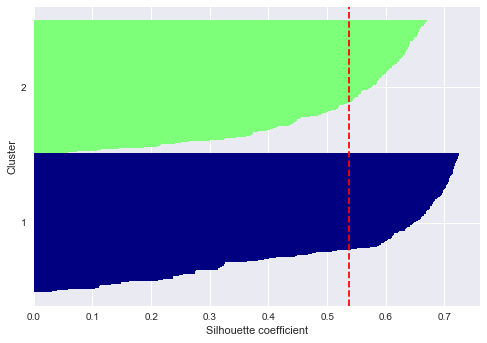

In [16]:
>>> cluster_labels = np.unique(y_km)
>>> n_clusters = cluster_labels.shape[0]
>>> silhouette_vals = silhouette_samples(X,y_km,metric='euclidean')
>>> y_ax_lower, y_ax_upper = 0, 0
yticks = []
>>> for i, c in enumerate(cluster_labels):
        c_silhouette_vals = silhouette_vals[y_km == c]
        c_silhouette_vals.sort()
        y_ax_upper += len(c_silhouette_vals)
        color = cm.jet(i / n_clusters)
        plt.barh(range(y_ax_lower, y_ax_upper),
        c_silhouette_vals,
        height=1.0,
        edgecolor='none',
        color=color)
        yticks.append((y_ax_lower + y_ax_upper) / 2)
        y_ax_lower += len(c_silhouette_vals)
>>> silhouette_avg = np.mean(silhouette_vals)
>>> plt.axvline(silhouette_avg, color="red", linestyle="--")
>>> plt.yticks(yticks, cluster_labels + 1)
>>> plt.ylabel('Cluster')
>>> plt.xlabel('Silhouette coefficient')
>>> plt.show()